# MINI Chanllenge


In [2]:
import csv
import os
import torch
import pandas as pd
from facenet_pytorch import MTCNN, InceptionResnetV1
from facenet_pytorch import MTCNN
from PIL import Image
import shutil

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## preprocessing

In [54]:
import cv2

# Load the image
image_path = "train/5120.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face detector from OpenCV
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) == 0:
    print("No faces found in the image.")
else:
    # Find the face with the largest area (assumed to be the main face)
    largest_face_index = max(range(len(faces)), key=lambda i: faces[i][2] * faces[i][3])

    # Extract the coordinates of the largest face
    x, y, w, h = faces[largest_face_index]

    # Crop the face from the original image
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face as a new image
    cropped_face_path = "cropped_face_opencv.jpg"
    cv2.imwrite(cropped_face_path, cropped_face)

    print("Cropped face saved successfully.")


No faces found in the image.


#### Crop out faces

In [25]:
# Function to process images and save cropped versions
def crop_images(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    fail_dir = os.path.join(output_dir, 'failed_to_convert')
    os.makedirs(fail_dir, exist_ok=True)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    mtcnn = MTCNN(image_size=256, min_face_size=45, device=device, selection_method = 'probability')

    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            # Apply MTCNN and save the cropped image
            img = Image.open(input_path).convert('RGB')
            try:
                img_cropped = mtcnn(img = img,
                                    save_path=output_path)
                if img_cropped is None: # no face detected
                    fail_path = os.path.join(fail_dir, filename)
                    shutil.copyfile(input_path, fail_path)
                    print(f"Failed to detect faces: {input_path}")
                # else:
                #     print(f"Processed: {input_path}")
            except Exception as e:
                fail_path = os.path.join(fail_dir, filename)
                shutil.copyfile(input_path, fail_path)
                print(f"Error processing {input_path}: {e}")
                print(f"save to {fail_path}: {e}")

In [27]:
# crop train data
input_dir = 'train'
output_dir = 'train_crop'
crop_images(input_dir, output_dir)

Failed to detect faces: train\10016.jpg
Failed to detect faces: train\10053.jpg
Failed to detect faces: train\10086.jpg
Failed to detect faces: train\10155.jpg
Failed to detect faces: train\10183.jpg
Failed to detect faces: train\10184.jpg
Failed to detect faces: train\10328.jpg
Failed to detect faces: train\10413.jpg
Failed to detect faces: train\10499.jpg
Failed to detect faces: train\10548.jpg
Failed to detect faces: train\10576.jpg
Failed to detect faces: train\10589.jpg
Failed to detect faces: train\10590.jpg
Failed to detect faces: train\10596.jpg
Failed to detect faces: train\106.jpg
Failed to detect faces: train\10624.jpg
Failed to detect faces: train\10647.jpg
Failed to detect faces: train\10691.jpg
Failed to detect faces: train\107.jpg
Failed to detect faces: train\10789.jpg
Failed to detect faces: train\10893.jpg
Failed to detect faces: train\10904.jpg
Failed to detect faces: train\10921.jpg
Failed to detect faces: train\10960.jpg
Failed to detect faces: train\10963.jpg
Fail

c:\Users\Carlos Tsai\.conda\envs\stylegan3\lib\site-packages\PIL\TiffImagePlugin.py:811: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Failed to detect faces: train\59794.jpg
Failed to detect faces: train\59825.jpg
Failed to detect faces: train\59835.jpg
Failed to detect faces: train\59849.jpg
Failed to detect faces: train\59875.jpg
Failed to detect faces: train\59880.jpg
Failed to detect faces: train\59892.jpg
Failed to detect faces: train\59931.jpg
Failed to detect faces: train\59957.jpg
Failed to detect faces: train\59963.jpg
Failed to detect faces: train\59978.jpg
Failed to detect faces: train\60041.jpg
Failed to detect faces: train\60120.jpg
Failed to detect faces: train\60122.jpg
Failed to detect faces: train\60123.jpg
Failed to detect faces: train\60140.jpg
Failed to detect faces: train\60176.jpg
Failed to detect faces: train\60206.jpg
Failed to detect faces: train\60268.jpg
Failed to detect faces: train\60273.jpg
Failed to detect faces: train\60341.jpg
Failed to detect faces: train\60394.jpg
Failed to detect faces: train\60410.jpg
Failed to detect faces: train\60481.jpg
Failed to detect faces: train\60501.jpg


In [105]:
# crop test data
input_dir = 'test'
output_dir = 'test_crop'
crop_images(input_dir, output_dir)

Failed to detect faces: test\1036.jpg
Failed to detect faces: test\1141.jpg
Failed to detect faces: test\1154.jpg
Failed to detect faces: test\1175.jpg
Failed to detect faces: test\1277.jpg


c:\Users\Carlos Tsai\.conda\envs\stylegan3\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed to detect faces: test\133.jpg
Failed to detect faces: test\1351.jpg
Failed to detect faces: test\1362.jpg
Failed to detect faces: test\1499.jpg
Failed to detect faces: test\1508.jpg
Failed to detect faces: test\151.jpg
Failed to detect faces: test\1514.jpg
Failed to detect faces: test\1543.jpg
Failed to detect faces: test\1658.jpg
Failed to detect faces: test\166.jpg
Failed to detect faces: test\1663.jpg
Failed to detect faces: test\1708.jpg
Failed to detect faces: test\1749.jpg
Failed to detect faces: test\1814.jpg
Failed to detect faces: test\1826.jpg
Failed to detect faces: test\1855.jpg
Failed to detect faces: test\1856.jpg
Failed to detect faces: test\1868.jpg
Failed to detect faces: test\1936.jpg
Failed to detect faces: test\198.jpg
Failed to detect faces: test\1997.jpg
Failed to detect faces: test\2008.jpg
Failed to detect faces: test\2088.jpg
Failed to detect faces: test\210.jpg
Failed to detect faces: test\217.jpg
Failed to detect faces: test\2175.jpg
Failed to detect f

#### Sort training data

In [3]:
import shutil
input_dir = 'train_crop'
output_dir = 'train_sort'

# Load train.csv and category.csv into pandas DataFrames
train_df = pd.read_csv('metadata/train.csv')
category_df = pd.read_csv('metadata/category.csv')

# Create category folders if they don't exist
os.makedirs(output_dir , exist_ok=True)
for category in category_df['Category']:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Iterate over each row in train.csv
for index, row in train_df.iterrows():
    file_name = row['File Name']
    category = row['Category']
    src_path = os.path.join(input_dir, file_name)
    dest_path = os.path.join(output_dir, category, file_name)
    
    # shutil.move(src_path, dest_path)
    try:
        shutil.copyfile(src_path, dest_path)
    except Exception as e:
        print(f"Error processing {src_path}: {e}")

Error processing train_crop\45.jpg: [Errno 2] No such file or directory: 'train_crop\\45.jpg'
Error processing train_crop\96.jpg: [Errno 2] No such file or directory: 'train_crop\\96.jpg'
Error processing train_crop\106.jpg: [Errno 2] No such file or directory: 'train_crop\\106.jpg'
Error processing train_crop\107.jpg: [Errno 2] No such file or directory: 'train_crop\\107.jpg'
Error processing train_crop\129.jpg: [Errno 2] No such file or directory: 'train_crop\\129.jpg'
Error processing train_crop\151.jpg: [Errno 2] No such file or directory: 'train_crop\\151.jpg'
Error processing train_crop\178.jpg: [Errno 2] No such file or directory: 'train_crop\\178.jpg'
Error processing train_crop\296.jpg: [Errno 2] No such file or directory: 'train_crop\\296.jpg'
Error processing train_crop\385.jpg: [Errno 2] No such file or directory: 'train_crop\\385.jpg'
Error processing train_crop\400.jpg: [Errno 2] No such file or directory: 'train_crop\\400.jpg'
Error processing train_crop\425.jpg: [Errno 

### Building dataset

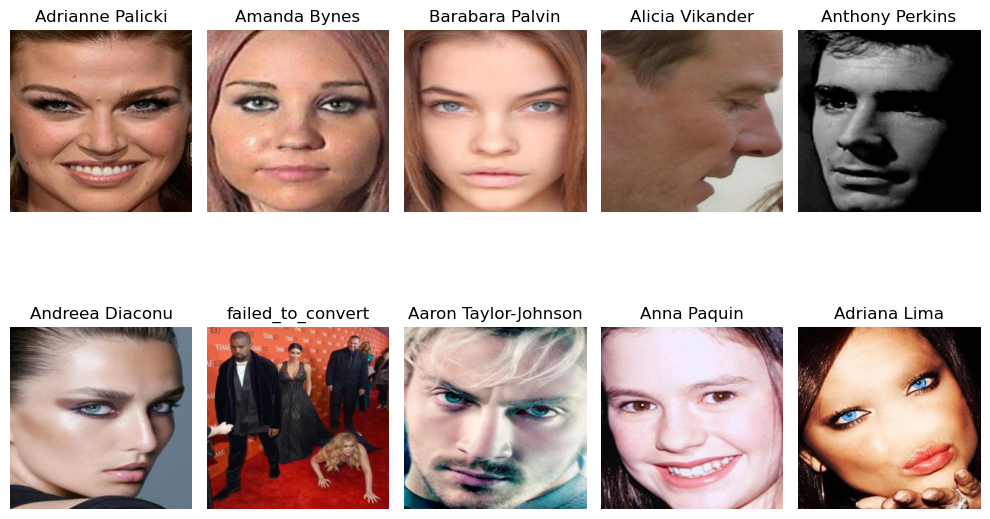

In [52]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485], std=[0.229])  # Assuming single channel input
])

# test dataloader
data_path = 'train_sort'
dataset = datasets.ImageFolder(data_path, transform=transform)
dataset_test_loader = DataLoader(dataset, batch_size=32, shuffle=True)
classes = dataset.classes
data_iter = iter(dataset_test_loader)
images, labels = data_iter.next()

plt.figure(figsize=(10, 7))
for i in range(10):
    # Convert the image tensor to a NumPy array
    image = make_grid(images[i]).permute(1, 2, 0).numpy()
    name = classes[labels[i].item()]
    # Display the image along with its category
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(name)
    plt.axis('off')
# Adjust layout and display the grid
plt.tight_layout()
plt.show()

## Train

## Train- pytorch builtin vgg16

using pytorch pretrain vgg19 as base model, remove the layer fully connected layer and train on cropped faces.

### Define post feature extraction nn model

In [13]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = 101
class FaceClassifier(nn.Module):
    def __init__(self, input_size, num_classes=num_classes):
        super(FaceClassifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.dropout(x)
        x = self.relu(x)
        output = self.fc(x)
        return output

### Define dataloader and train-test split

In [23]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    # transforms.Normalize(mean=[0.485], std=[0.229])  # Assuming single channel input
])

data_path = 'train_sort'
dataset = datasets.ImageFolder(data_path, transform=transform)

# Split dataset into training and testing sets
dataset_size = len(dataset)
test_split = 0
test_size = int(test_split * dataset_size)
train_size = dataset_size - test_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Creating data loaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Training loop

In [29]:
from datetime import datetime
from torchvision import models
import matplotlib.pyplot as plt
# transfer learning
model_path = 'epoch6_2109.pth'
# model_path = None
# Initialize the FaceClassifier
model = FaceClassifier(input_size=32768, num_classes=len(dataset.classes))  # Input size based on VGG16 features
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # use gpu if possible
if model_path is not None:
    model.load_state_dict(torch.load(model_path))
model = model.to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum = 0.5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# feature extraction model
extrac_model = models.vgg16(pretrained=True)
extrac_model = nn.Sequential(*(list(extrac_model.features.children())))
extrac_model.to(device)
extrac_model.eval()

# Lists to store loss and accuracy values
train_losses = []
test_accuracies = []

In [30]:
# Training loop
num_epochs = 6
for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Extract features
        with torch.no_grad():
            features = extrac_model(inputs)
        features = torch.flatten(features, 1)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}")
            train_losses.append(running_loss / 100)  # Store the running loss
            running_loss = 0.0
            
    # Evaluation
    if test_split != 0:
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for data in test_loader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                # Extract features  b
                with torch.no_grad():
                    features = extrac_model(images)
                    features = torch.flatten(features, 1)
                    outputs = model(features)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            test_accuracy = 100 * correct / total
            print('Accuracy of the network on the test images: %d %%' % test_accuracy)
            test_accuracies.append(test_accuracy)

    # save progress every 5 epoch
    if epoch % 2 == 1:
        now = datetime.now() # current date and time
        model_name = now.strftime(f"epoch{epoch+1}_%H%M") + '.pth'
        print("save model:",model_name)
        torch.save(model.state_dict(), model_name)
print("Finished Training")

Epoch [1/6], Batch [100/1061], Loss: 0.4372
Epoch [1/6], Batch [200/1061], Loss: 0.4509
Epoch [1/6], Batch [300/1061], Loss: 0.4328
Epoch [1/6], Batch [400/1061], Loss: 0.4309
Epoch [1/6], Batch [500/1061], Loss: 0.4561
Epoch [1/6], Batch [600/1061], Loss: 0.3972
Epoch [1/6], Batch [700/1061], Loss: 0.4235
Epoch [1/6], Batch [800/1061], Loss: 0.4339
Epoch [1/6], Batch [900/1061], Loss: 0.4550
Epoch [1/6], Batch [1000/1061], Loss: 0.4299


KeyboardInterrupt: 

#### plot loss and acc

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

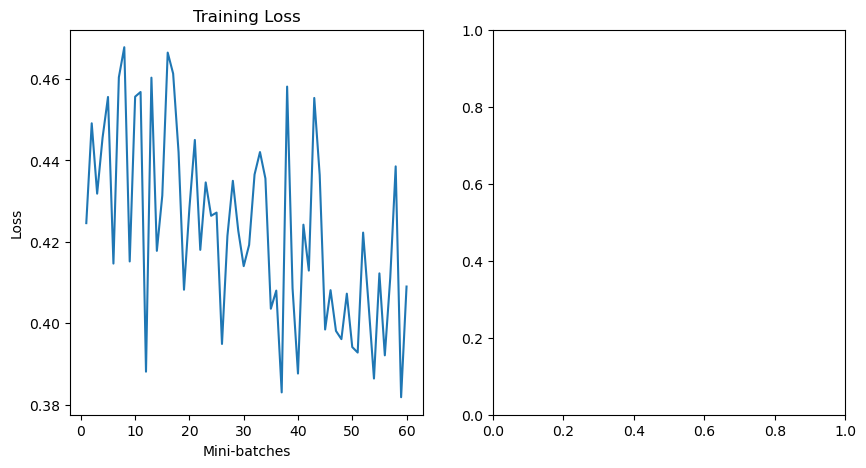

In [28]:
# Plotting loss and accuracy graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Mini-batches')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')

plt.tight_layout()
plt.show()

In [18]:
# transfer learning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # use gpu if possible
model_path = "epoch2_2046.pth"
model = FaceClassifier(input_size=32768, num_classes=len(dataset.classes))  # Input size based on VGG16 features
model.load_state_dict(torch.load(model_path))
model = model.to(device)
classes = dataset.classes

model.eval()
results = []
test_dir = 'test_crop'
for ID in range(4977):
    try:
        filename = str(ID) + '.jpg'
        image_path = os.path.join(test_dir, filename)
        img = Image.open(image_path).convert('RGB')
        img = transform(img)
        img = img.unsqueeze(0) # add batch dim
        images = img.to(device)

        # Extract features
        with torch.no_grad():
            features = extrac_model(images)
            features = torch.flatten(features, 1)
            output = model(features)

        predicted_label = torch.argmax(output, dim=1).item()
        predicted_name = classes[predicted_label]

        results.append((ID,predicted_name))
    except Exception as e:
        print("Something went wrong:",filename, e)
        random_name = 'NA'
        results.append((ID,random_name))
        continue

# Write results to CSV
csv_file = "test_predicted_labels.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id','Category'])
    writer.writerows(results)

print("Predictions saved to", csv_file)

Something went wrong: 63.jpg [Errno 2] No such file or directory: 'test_crop\\63.jpg'
Something went wrong: 98.jpg [Errno 2] No such file or directory: 'test_crop\\98.jpg'
Something went wrong: 133.jpg [Errno 2] No such file or directory: 'test_crop\\133.jpg'
Something went wrong: 151.jpg [Errno 2] No such file or directory: 'test_crop\\151.jpg'
Something went wrong: 166.jpg [Errno 2] No such file or directory: 'test_crop\\166.jpg'
Something went wrong: 198.jpg [Errno 2] No such file or directory: 'test_crop\\198.jpg'
Something went wrong: 210.jpg [Errno 2] No such file or directory: 'test_crop\\210.jpg'
Something went wrong: 217.jpg [Errno 2] No such file or directory: 'test_crop\\217.jpg'
Something went wrong: 228.jpg [Errno 2] No such file or directory: 'test_crop\\228.jpg'
Something went wrong: 238.jpg [Errno 2] No such file or directory: 'test_crop\\238.jpg'
Something went wrong: 242.jpg [Errno 2] No such file or directory: 'test_crop\\242.jpg'
Something went wrong: 273.jpg [Errno